# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [2]:
#loading the dataset from pc
data = pd.read_csv("C:/Users/HUAWEI/Documents/greatlearning/supervised learning/project/used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
# take insight from first 5 rows 
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
# last five rows
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [5]:
# gitting the data shape 
data.shape

(3454, 15)

- There are 3454 rows and 15 columns

In [6]:
#Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

- There are 4 string data type (Brand name , os,4G,5G)
- There are 9 Float data type
- There are 2 int datatype (days used and release year)

In [7]:
#Statistical summary of the dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- There are 34 unique brand exist in the dataset and the most of the brands was classified as others 
- 93% of operating sysytem is andriod 
- The average screen size is almost 13.7 cm 
- Minimum screen size is 5.08 cm and maximum is 30.71
- More than 95% of phones dont support 5G 
- Most of devices are supporting 4G
- The average in mega pixel of main camera is 9.4 Mp while it ranges from 0 to 48 Mp
- The average in mega pixel of selfie camera is 6.55 Mp while it ranges from 0 to 32 Mp
- The average Amount of internal memory (ROM) in GB 54.57 while it ranges from 0 to 1024 GB
- The average Amount of RAM in GB 4.03 while it ranges from 0 to 12 GB
- The average of Energy capacity of the device battery in mAh 3133.4 while it ranges from 500 to 9720 GB
- The average of Weight of the device in grams is 182 
- The average Year of releasing the device model is 2015 while releasing year ranges from 2015 to 2020
- The average Number of days the used/refurbished device has been used is 674 days
- The avarage of the Normalized price of a new device of the same model in euros 5.2 
- The avarage of the Normalized price of a used device of the same model in euros 4.36 

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

- There are no duplicated values in the dataset 

In [9]:
# Checking for missing values
data.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- 179 missing values in main camera in mp
- 2 missing values in selfie camera in mp
- 4 missing values in both internal memory and ram memory
- 6 missing values in battery
- 7 missing values in weight 

In [10]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of  rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### normalized_used_price

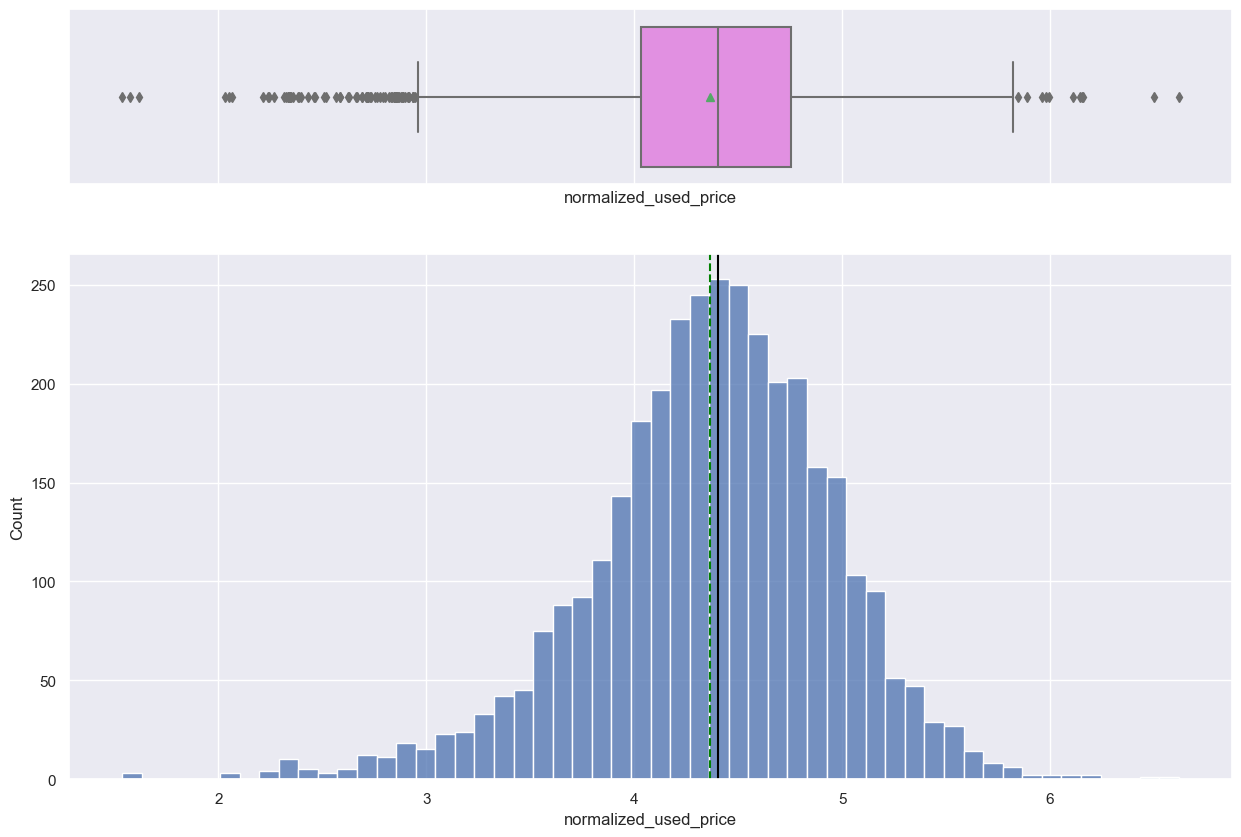

In [13]:
histogram_boxplot(df, "normalized_used_price")

What does the distribution of normalized used device prices look like?
- The distribution of the normalized used devices is nearly normal distributed however its slightly left skwed 

### normalized_new_price

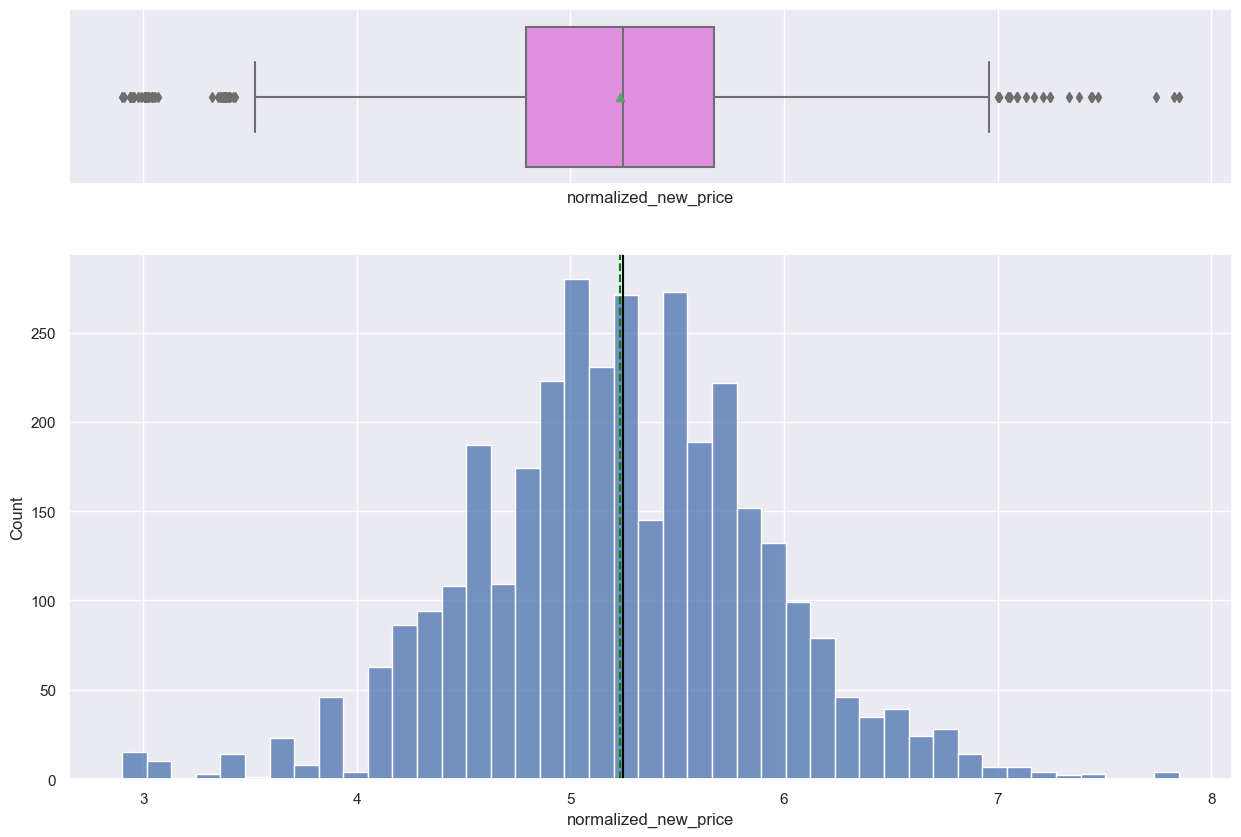

In [14]:
histogram_boxplot(df,'normalized_new_price')

What does the distribution of normalized new device prices look like?

- The distribution of the normalized new devices is nearly normal distributed 

### screen size 

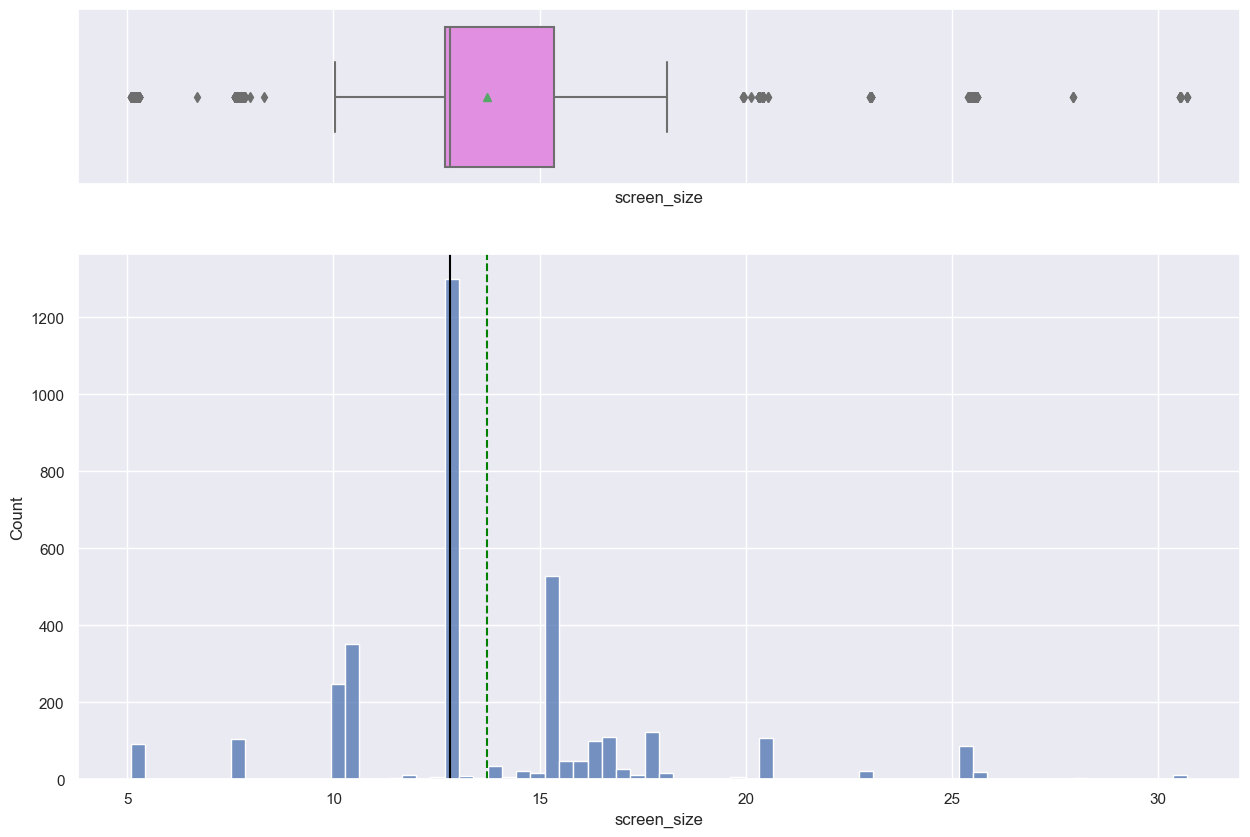

In [15]:
histogram_boxplot(df,'screen_size')

- Most of the devices have screen size range between 10 and 15 cm 

### main_camera_mp

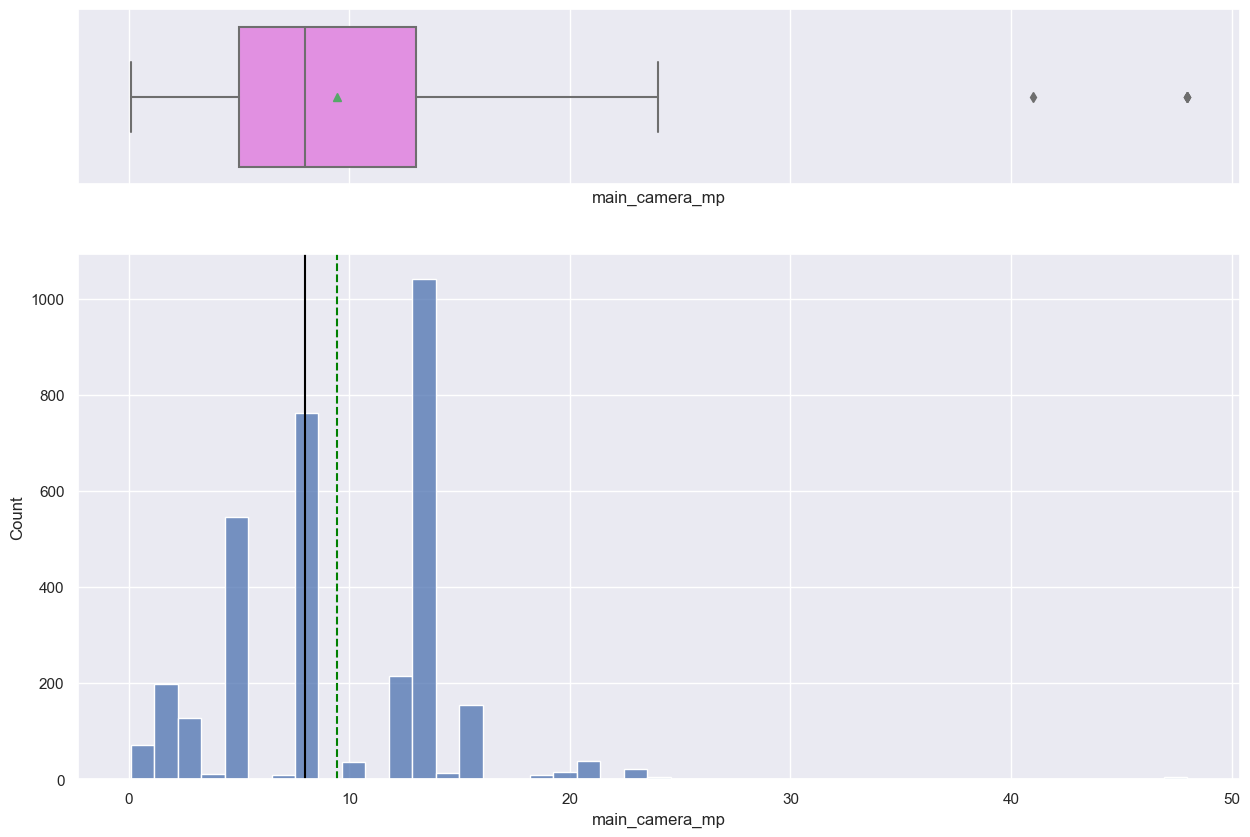

In [16]:
histogram_boxplot(df,'main_camera_mp') 

- There are 3 peaks in main camera mp which main that the most frequent camera mp is 5 , 8, 13 mp 

### selfie_camera_mp

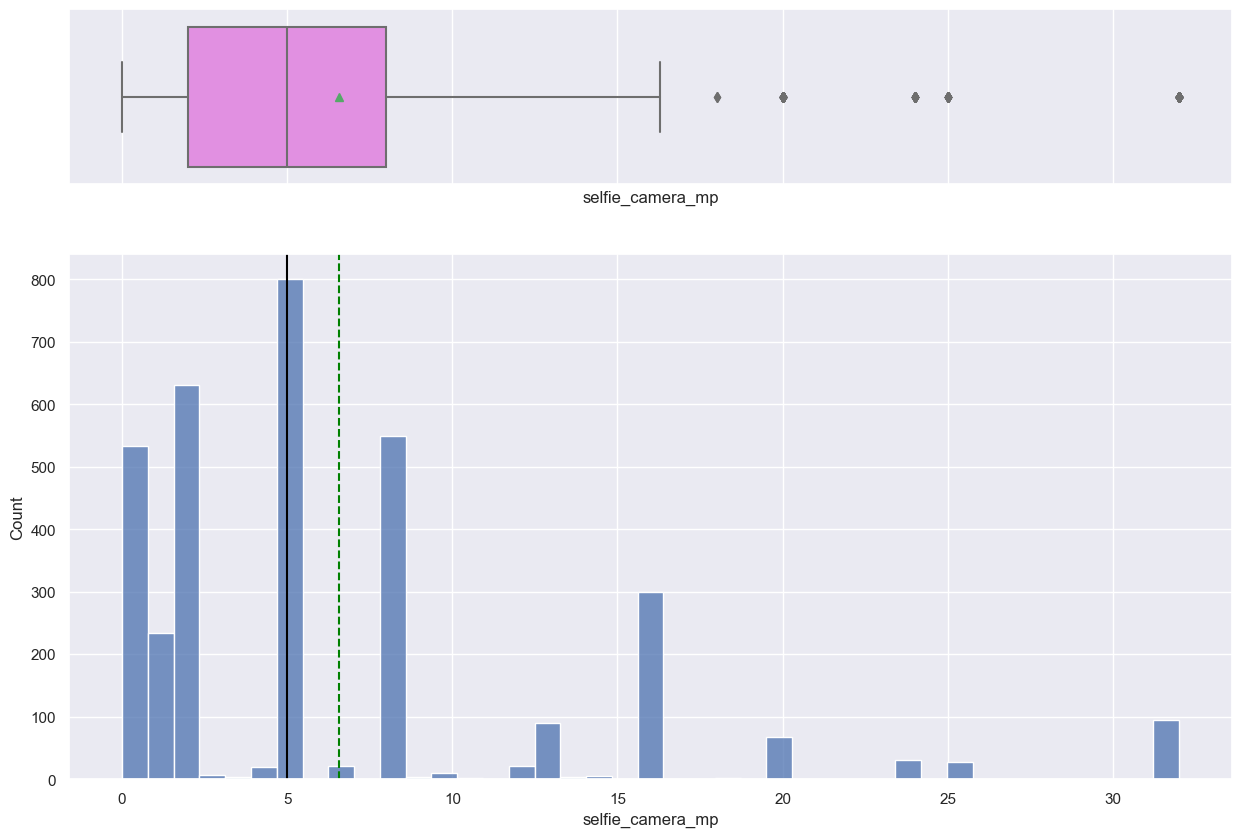

In [17]:
histogram_boxplot(df,'selfie_camera_mp')

- The most frequent camera mp is 5 mp

### internal memory

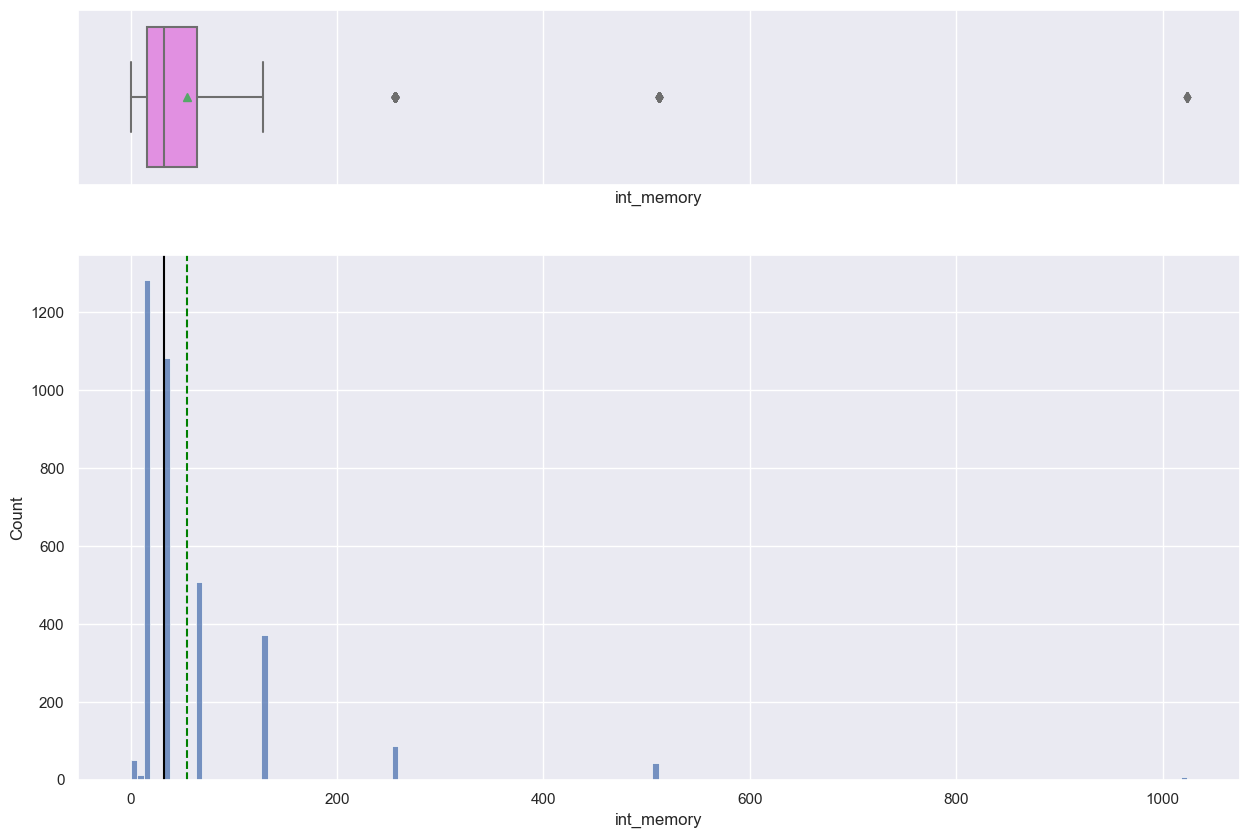

In [18]:
histogram_boxplot(df,'int_memory')

- The most values of internal memory ranges from 0 to 200 GB

### RAM Memory

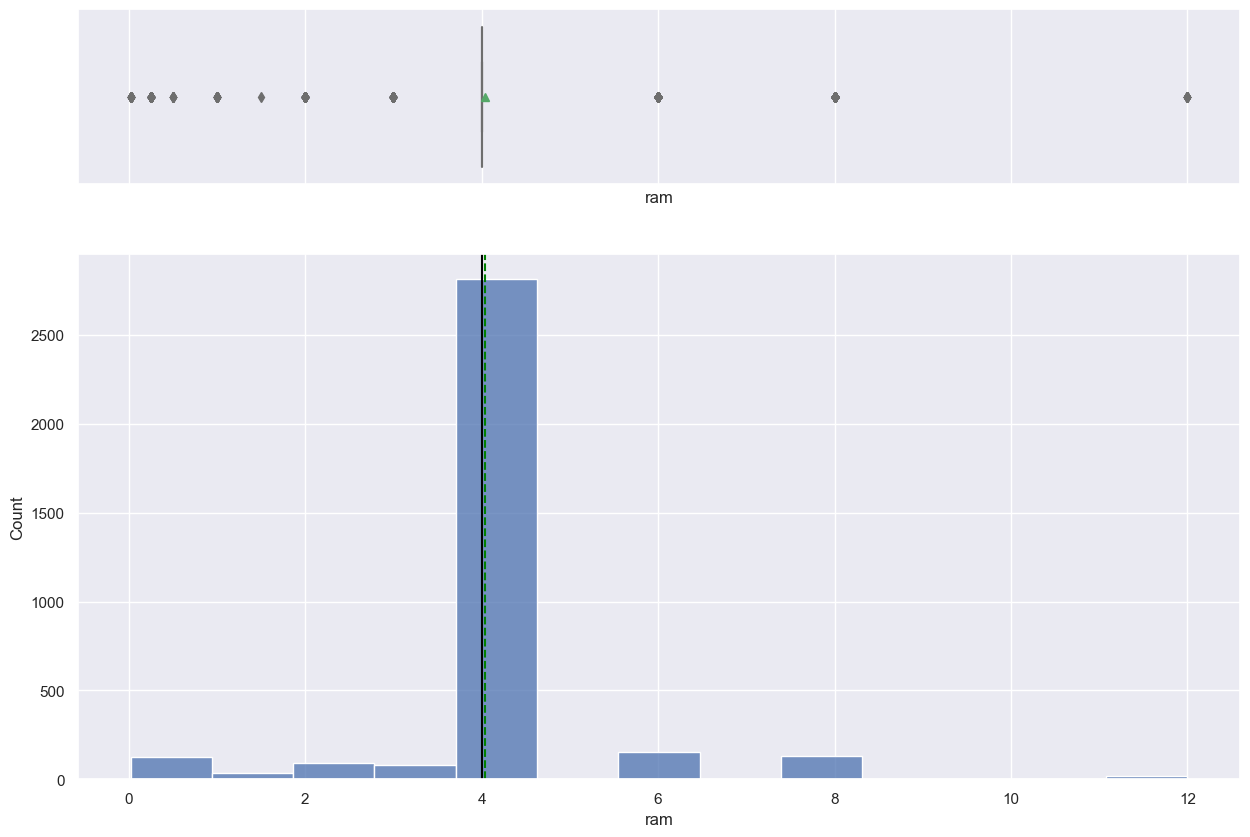

In [19]:
histogram_boxplot(df,'ram')

- The frequent ram memory in 4 GB

### Weight

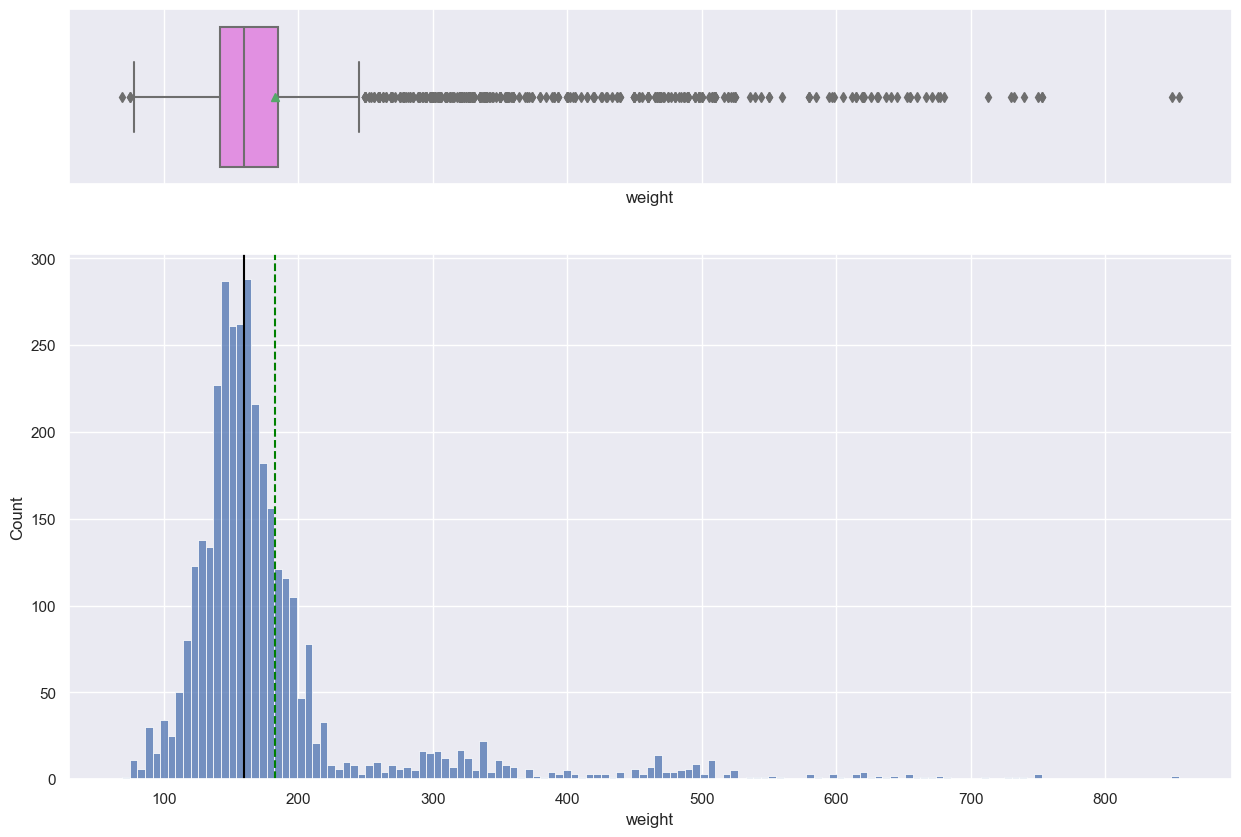

In [20]:
histogram_boxplot(df,'weight') 

- The shape of distribution is right skwed 
- Most of devices weight from 100 to 250 gram 

### Battery

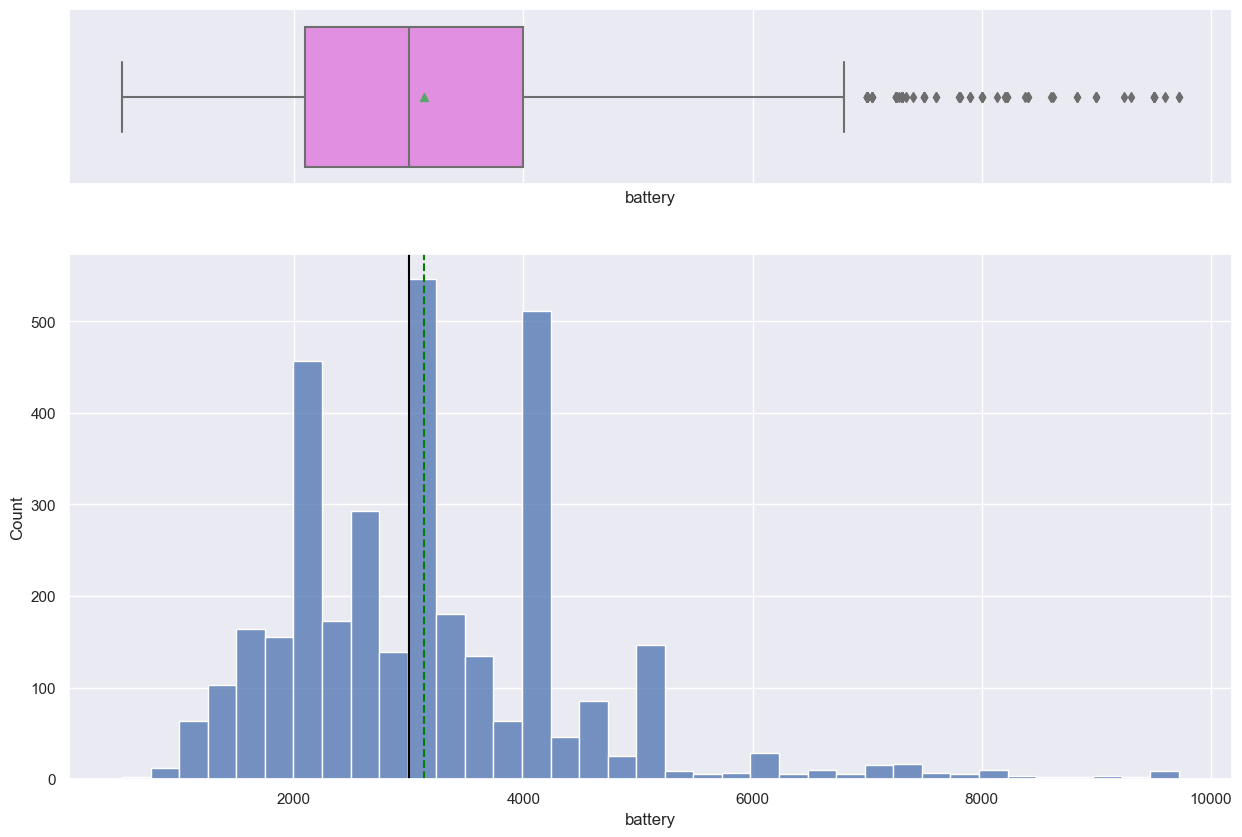

In [21]:
histogram_boxplot(df,'battery')

- The most frequent devices battery is nearly 3000 mA

### Days used

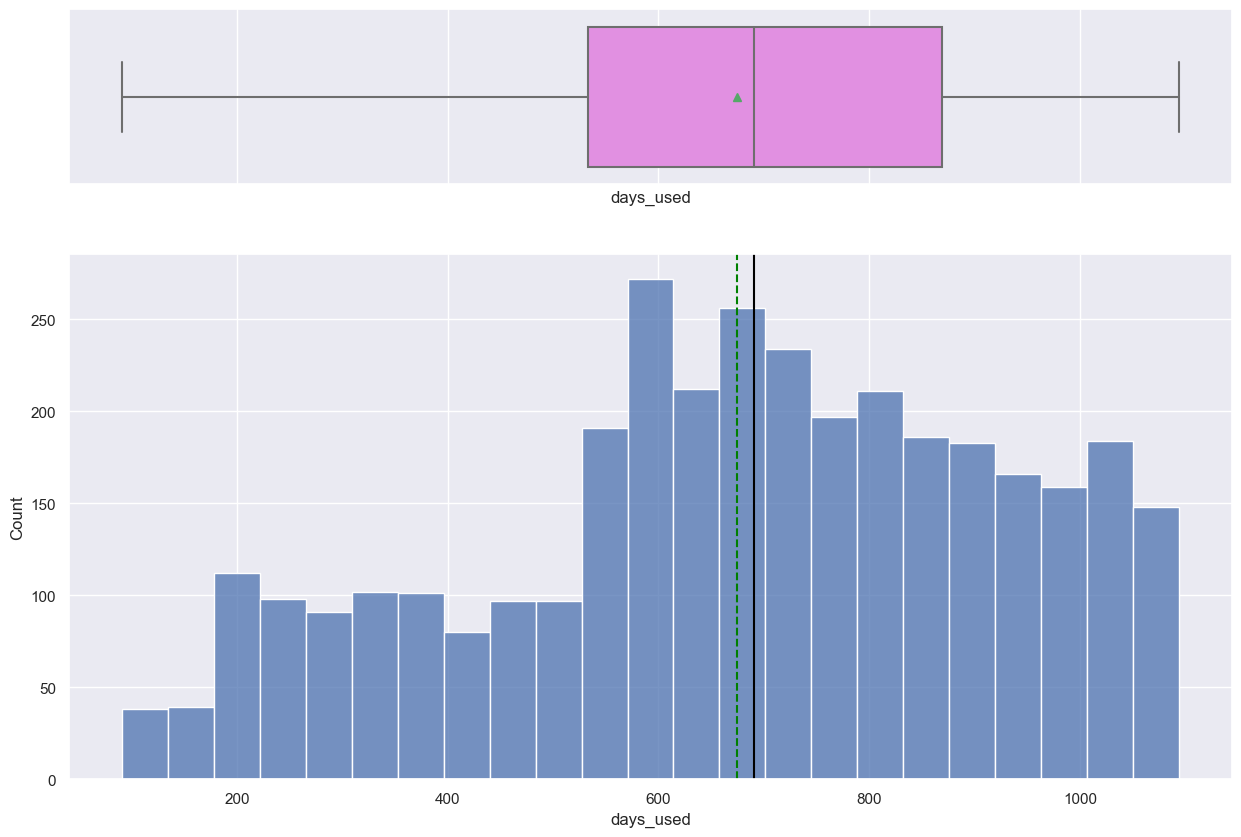

In [22]:
histogram_boxplot(df,'days_used')

### Brand name 

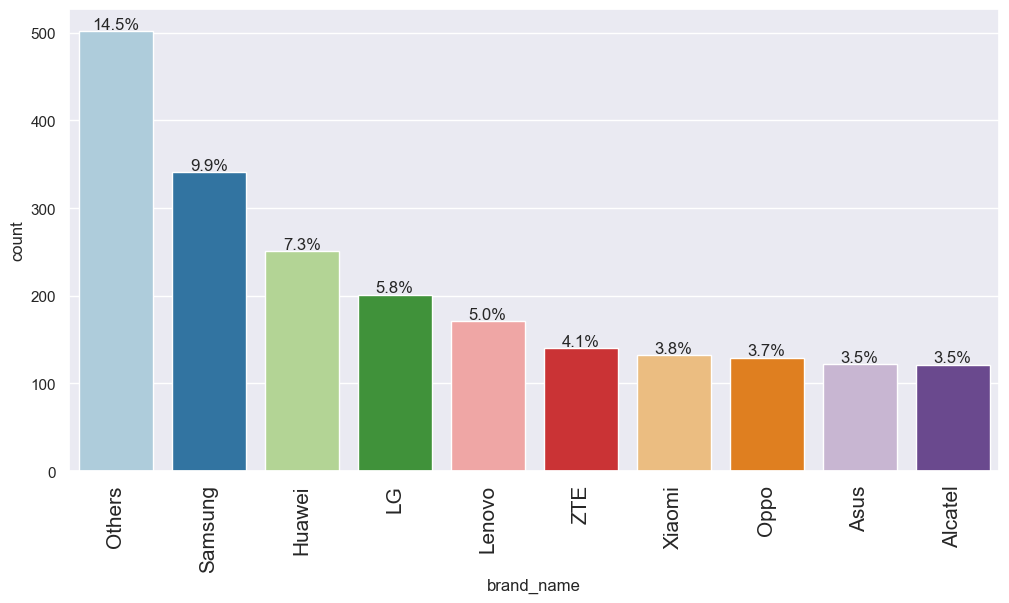

In [23]:
labeled_barplot(df, "brand_name", perc=True, n=10)

### Operating system

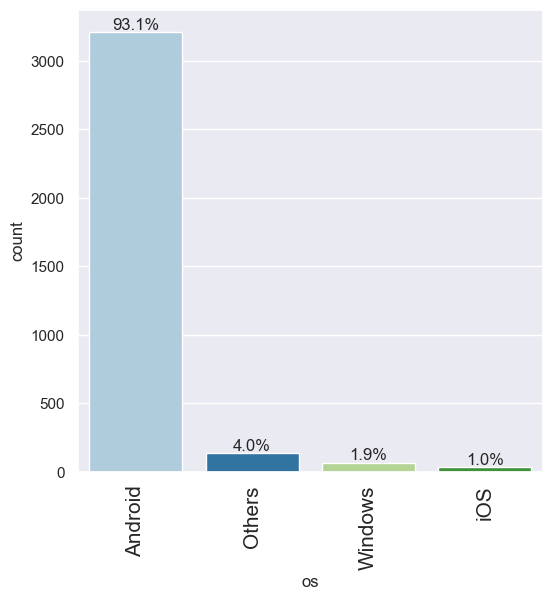

In [24]:
labeled_barplot(df, "os", perc=True)

- 93% of the os of the devices is Android 

### 4G

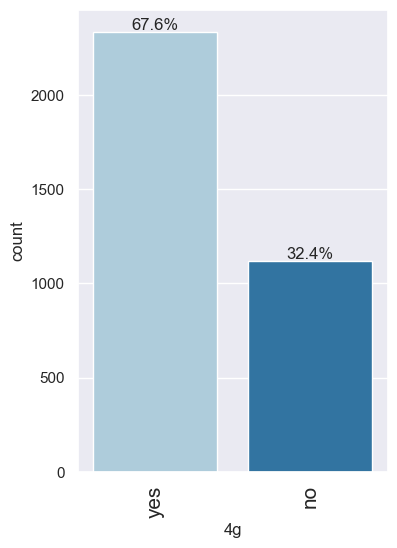

In [25]:
labeled_barplot(df, "4g", perc=True)

- 67% of the devices support 4G

### 5G

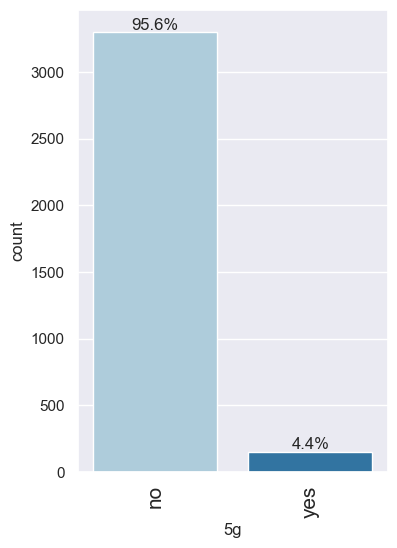

In [26]:
labeled_barplot(df, "5g", perc=True)

- 95.65 of the devices dont support 5G

### Release year 

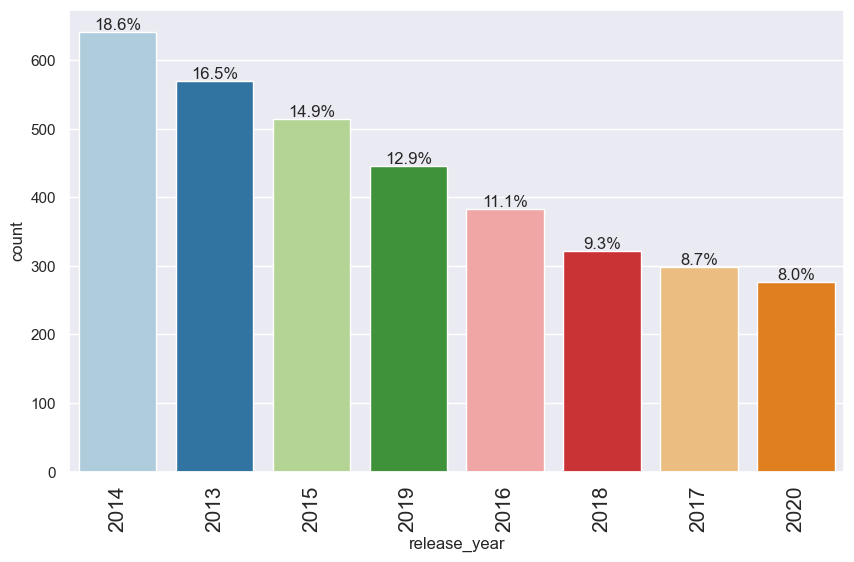

In [27]:
labeled_barplot(df, "release_year", perc=True)

- 18.6% of the devices were released in 2014 

### Bivariate analysis

#### Correlation Check

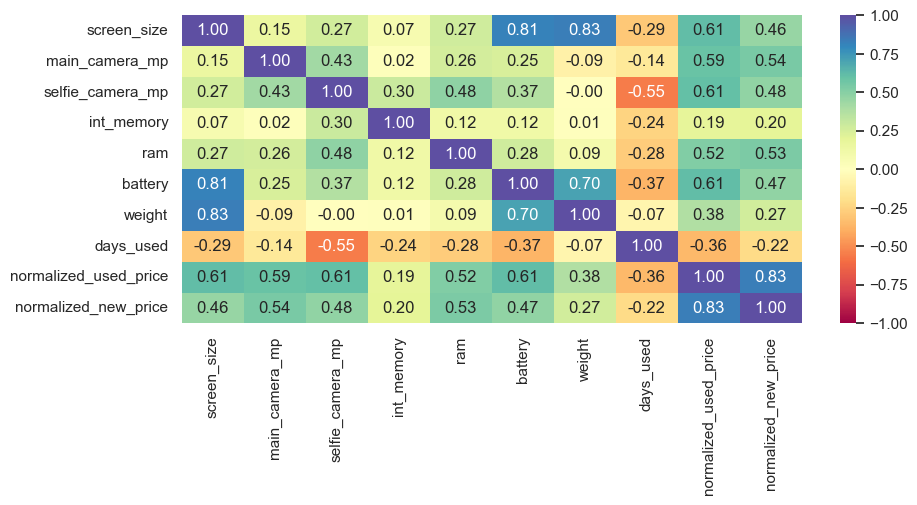

In [28]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(10,4))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Screen size and weight are the most correlated variables of .83 correlation 
- Screen size and battery are second most correlated variable of .81 correlation 
- Battery and weight are the third most correlated variable of .70 correlation 
- Normalized used price and screen size are kindly high correlated 

### Brand name and ram 

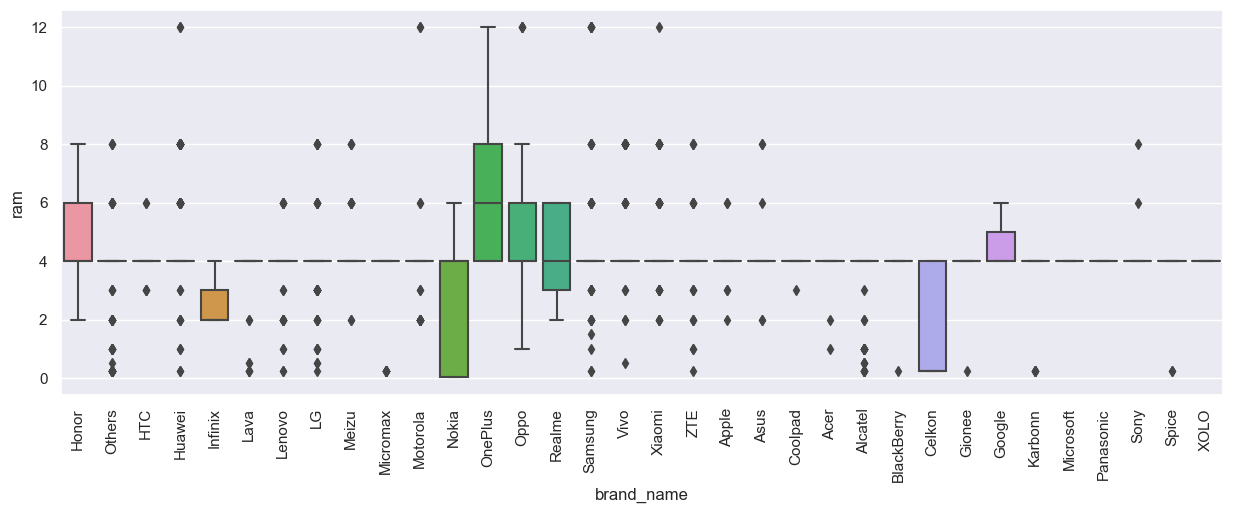

In [29]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

- Honor,Oneplus,Oppo and Realme are devices with have high ram memory , which have ram more than 4 GB

#### A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [30]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

- 341 devices have battery more than 4500 mA

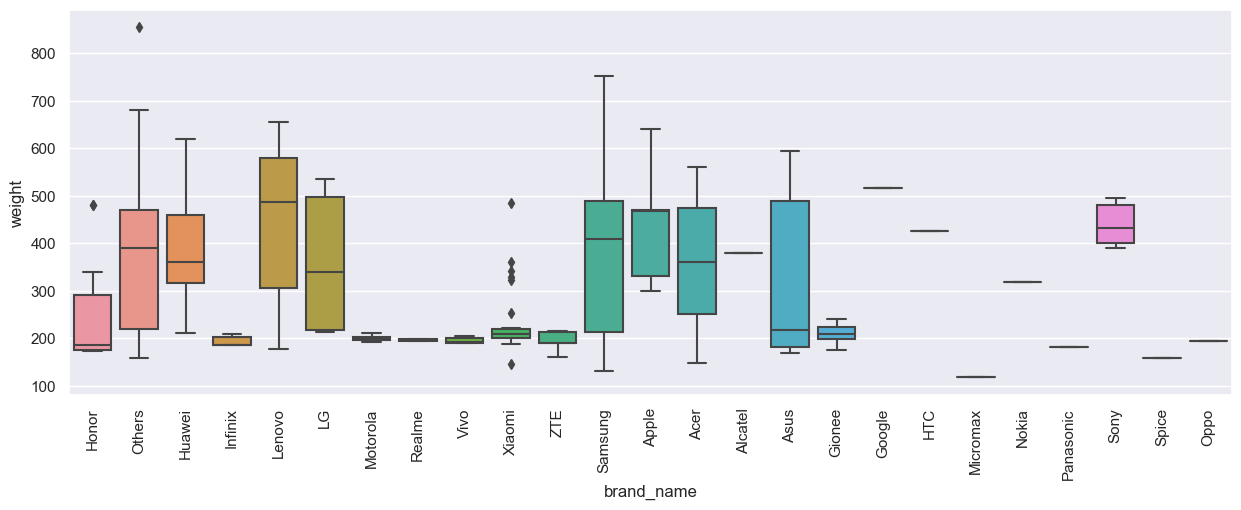

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery,x="brand_name",y="weight") 
plt.xticks(rotation=90)
plt.show()

- Brands with high battery have big weight 
- Honor devices with battery more than 4500 mA have weight in gram between 200 and 300
- Huawei devices with battery more than 4500 mA have weight in gram almost between 230 and 480 
- Samsung devices with battery more than 4500 mA have weight in gram almost between 210 and 490
- Asus devices with battery more than 4500 mA have weight in gram almost between 190 and 490

##### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [32]:
# multiply the value by 2.54 to convert it from cm to inches 
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

- 1099 device has screen size more than 6 inches 

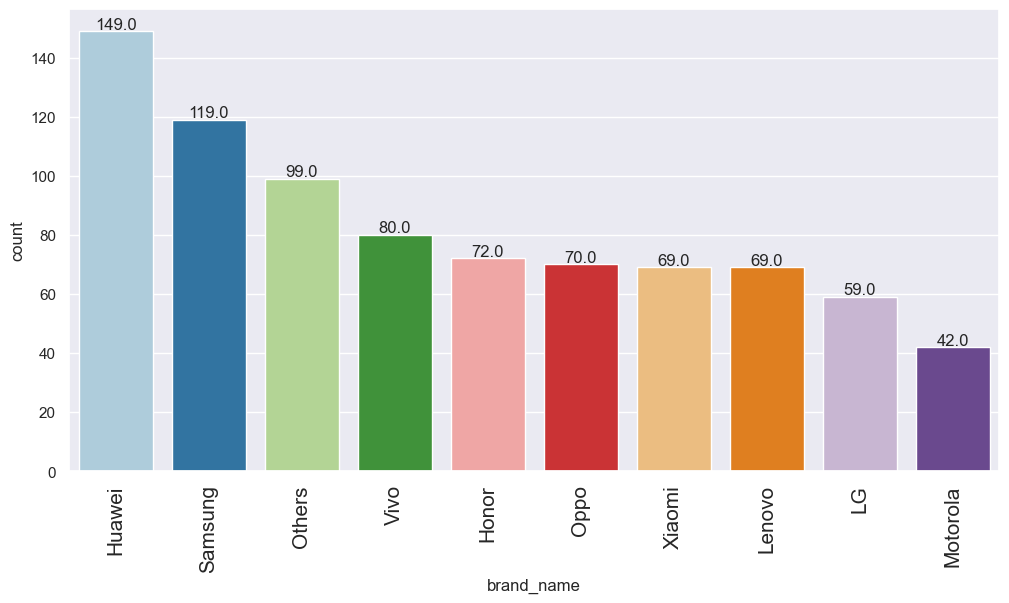

In [33]:
labeled_barplot(df_large_screen,"brand_name",n=10)

- Huawei and samsung most large screen devices 

##### A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [34]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

- There are 655 devices have selfie camera larger than 8 mp

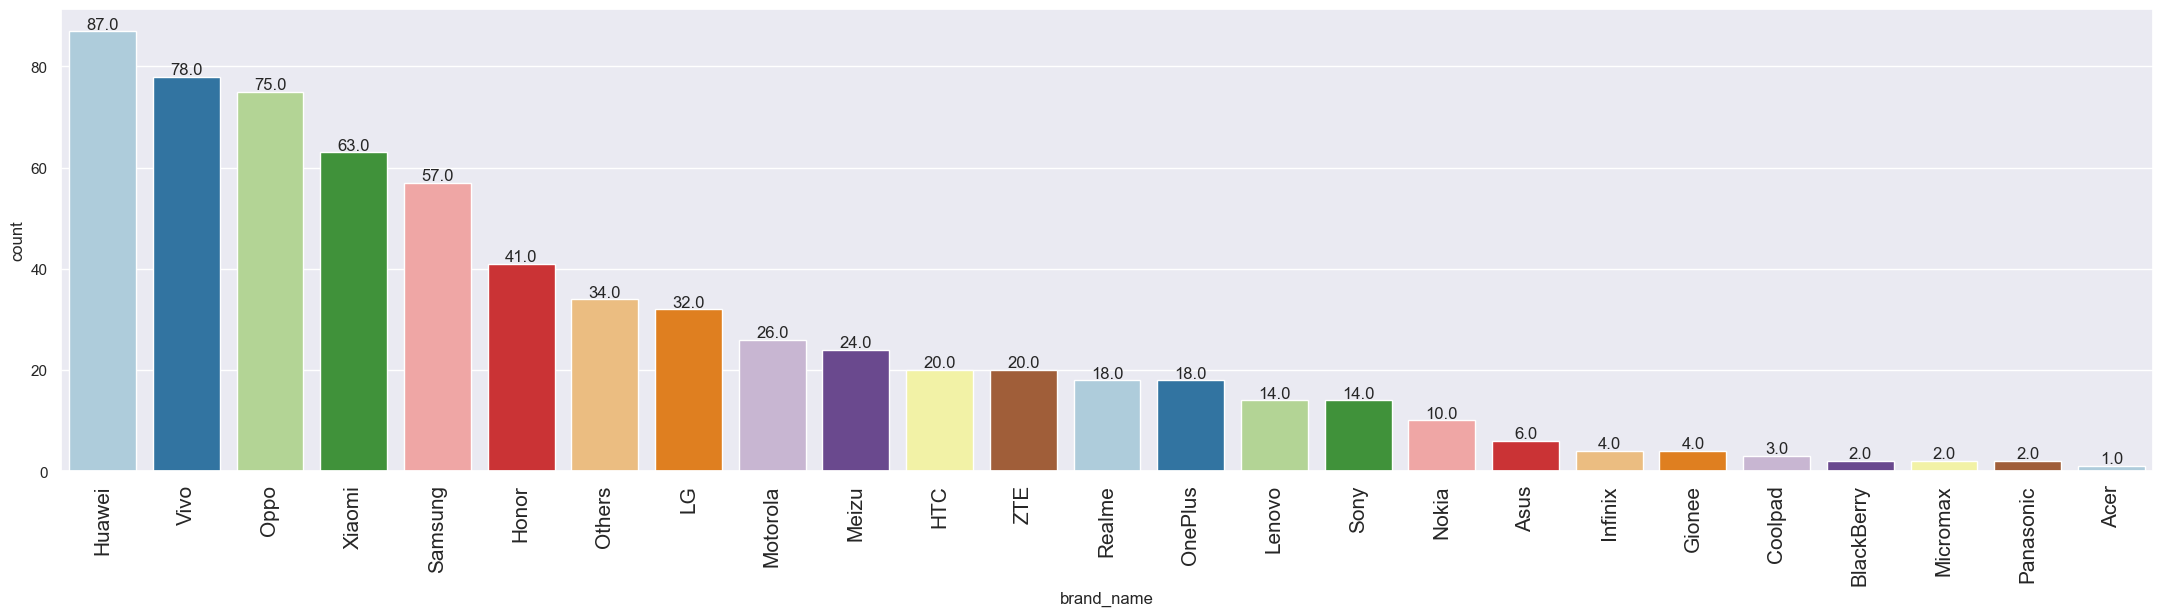

In [35]:
labeled_barplot(df_selfie_camera,'brand_name')

- Huawei have the larget camera mp

##### Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [36]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

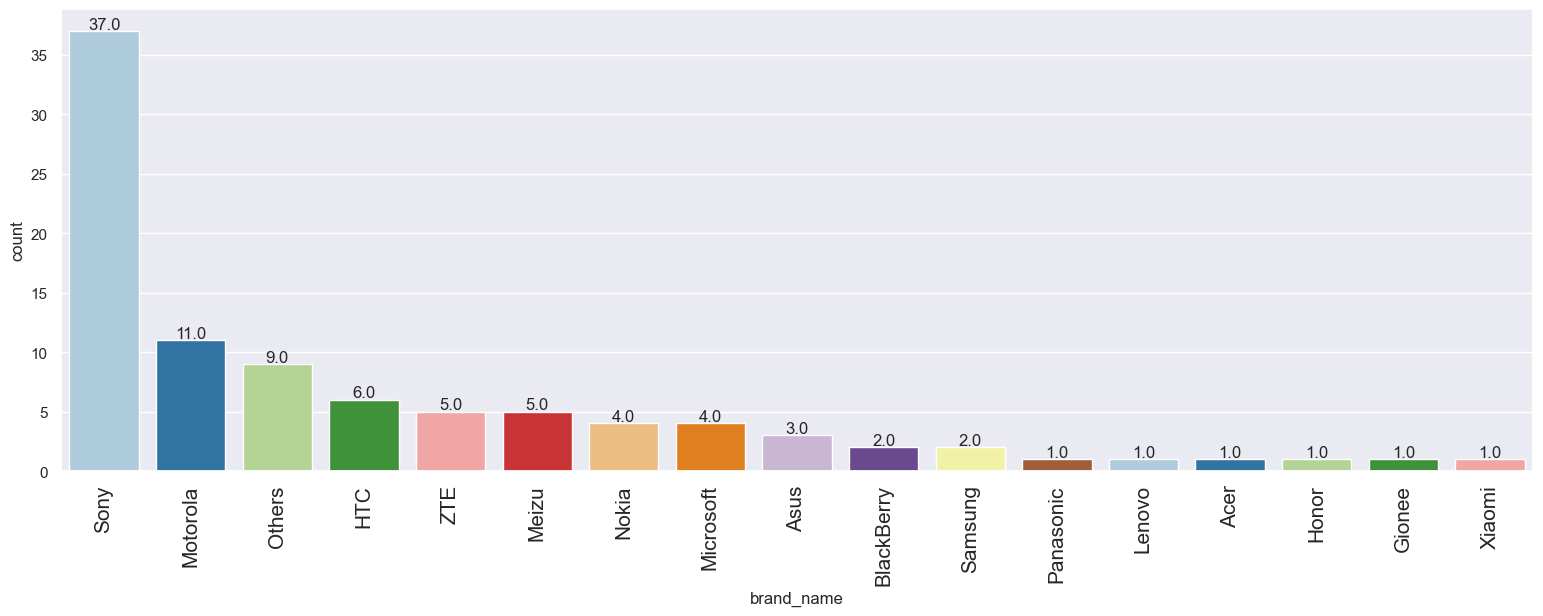

In [37]:
labeled_barplot(df_main_camera,"brand_name")

- sony devices have the highest main camera mp

#### Line plot release year and normalized used price 

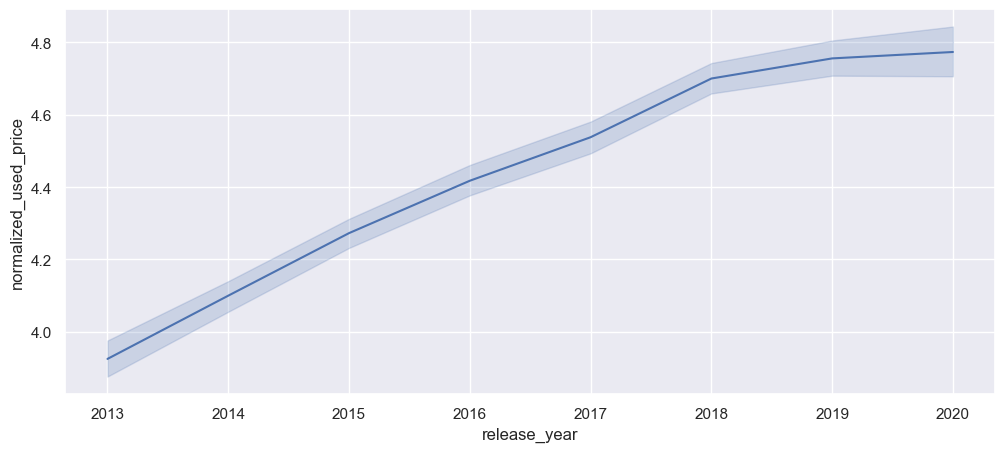

In [38]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price") 
plt.show()

##### How the prices vary for used phones and tablets offering 4G and 5G networks?

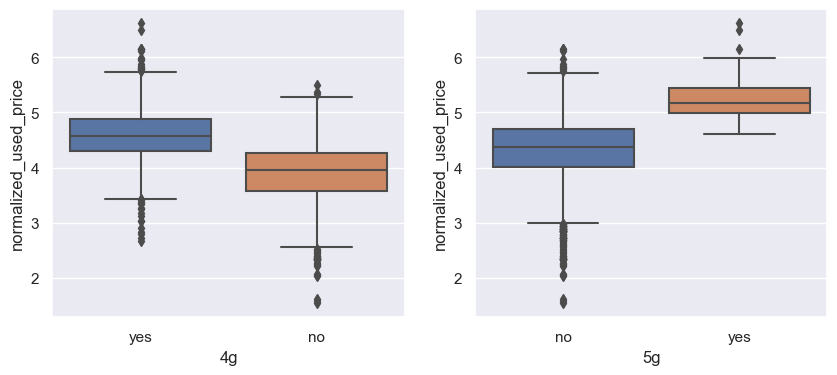

In [39]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

- Devices that support 4G have higher normalized used price between almost 4.2 and 4.9
- Devices that support 5G have higher normalized used price between almost 5 and 5.3

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Missing Value treatment 

##### We will impute the missing values in the data by the column medians grouped by release_year and brand_name.

In [40]:
# creating a copy of the data
df1 = df.copy()

In [41]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [42]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["release_year","brand_name"])[col].transform("median")
    )  

# checking for missing values
df1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

##### We will impute the remaining missing values in the data by the column medians grouped by brand_name

In [43]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(["brand_name"])[col].transform("median")
    ) 

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [44]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median()) 
# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

#### Feature Engineering

In [45]:
# create a new column years_since_release from the release_year column.
# We will consider the year of data collection, 2021, as the baseline.
df1["years_since_release"] = 2021 - df1["release_year"]
# drop the release_year column.
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

#### Outlier Check

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=2)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_7792\743718309.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout

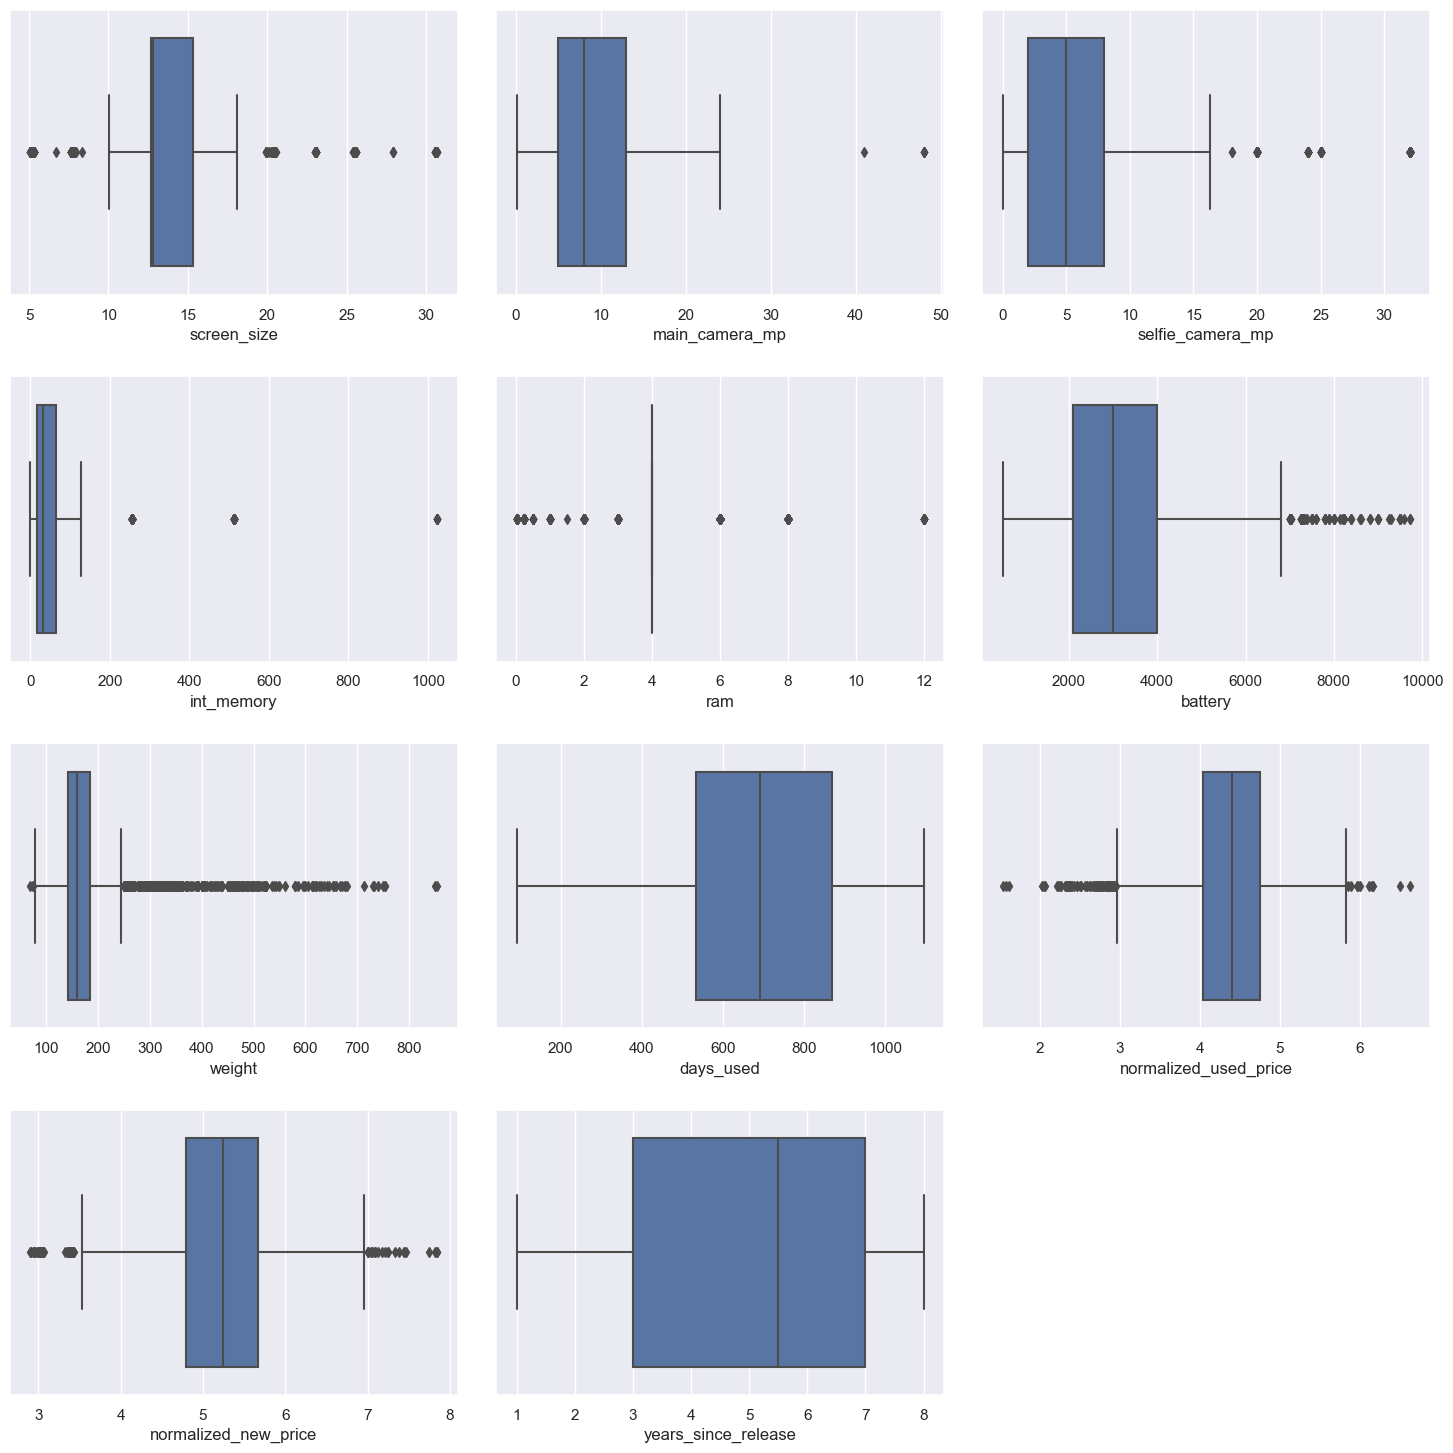

In [46]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

- all features have outliers except years since release, days_used 

#### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [47]:
# Define the dependent and independent variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [48]:
# let's add the intercept to data
X = sm.add_constant(X)

In [49]:
# creating dummy variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True, dtype=int)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [51]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [52]:
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           18:11:26   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [53]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [99]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test) 
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


- The training  𝑅2 is 0.844 so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalised used price  within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of normalised used price 

#### Interpreting the Regression Results:

1- Adjusted. R-squared: It reflects the fit of the model.

- Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- In our case, the value for adj. R-squared is 0.83 , which is good.

2- const coefficient: It is the Y-intercept.

- It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
- In our case, the value for const coefficient is 1.31

3- Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).

- In our case, the coefficient of screen size is 0.02

Checking Linear Regression Assumptions## 

##### In order to make statistical inferences from a linear regression model, it is important to ensure that these five assumptions of linear regression are satisfied.

- No Multicollinearity

- Linearity of variables

- Independence of error terms

- Normality of error terms

- No Heteroscedasticity

#### TEST FOR MULTICOLLINEARITY

We will test for multicollinearity using VIF.

General Rule of thumb:

- If VIF is 1 then there is no correlation between the  𝑘th predictor and the remaining predictor variables.
- If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
- If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [56]:
# Define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [57]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


- There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
- We will systematically drop numerical columns with VIF > 5
- We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

- Drop every column one by one that has a VIF score greater than 5.
- Look at the adjusted R-squared and RMSE of all these models.
- Drop the variable that makes the least change in adjusted R-squared.
- Check the VIF scores again.
- Continue till you get all VIF scores under 5.

In [58]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [97]:
# Complete the code to specify the columns with high VIF
col_list = ['screen_size',"brand_name_Apple","brand_name_Huawei","brand_name_Others","os_iOS"]
res = treating_multicollinearity(x_train, y_train, col_list) ## Complete the code to check the effect on model performance after dropping specified columns from train data
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Apple,0.841809,0.232201
1,brand_name_Huawei,0.841808,0.232201
2,brand_name_Others,0.841806,0.232203
3,os_iOS,0.841795,0.232211
4,screen_size,0.838381,0.234703


In [83]:
## drop the columns 
col_to_drop = 'brand_name_Apple'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] 
# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Apple


,feature,VIF
0,const,227.303871
1,screen_size,7.643583
2,main_camera_mp,2.284429
3,selfie_camera_mp,2.791121
4,int_memory,1.364138
5,ram,2.273686
6,battery,4.079720
7,weight,6.394014
8,days_used,2.659799
9,normalized_new_price,3.102417


- VIF after removing brand name apple 

In [84]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     274.5
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           18:32:56   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -151.7
Df Residuals:                       2369   BIC:                             126.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Dropping high p-value variables 
- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

**Instead, we will do the following**:
- Build a model, check the p-values of the variables, and drop the column with the highest p-value.
- Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
- Repeat the above two steps till there are no columns with p-value > 0.05.
- The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [62]:
# initial list of columns
predictors = x_train2.copy()  ## Complete the code to check for p-values on the right dataset
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

   # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [63]:
## Complete the code to specify the train data from which to select the specified columns
x_train3 = x_train2[selected_features] 
x_test3 = x_train2[selected_features]

In [64]:
## Complete the code fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           18:12:34   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [65]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) 
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


**Now we'll check the rest of the assumptions on olsmodel2.**

- Linearity of variables

- Independence of error terms

- Normality of error terms

- No Heteroscedasticity

#### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [66]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.855243,0.232245
1525,4.448399,4.628813,-0.180413
1128,4.315353,4.280778,0.034574
3003,4.282068,4.206270,0.075798
2907,4.456438,4.470315,-0.013877


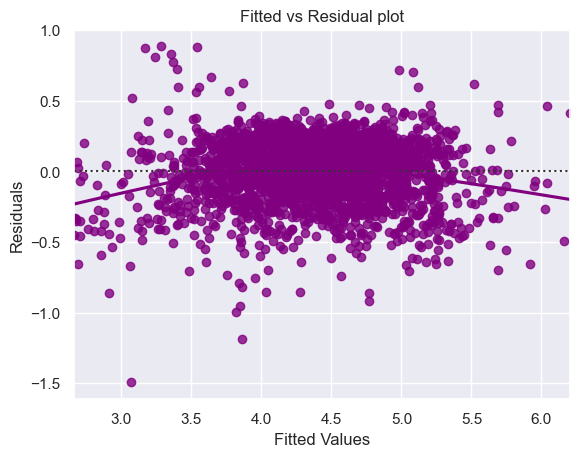

In [67]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

- If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

- We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.

#### TEST FOR NORMALITY

We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

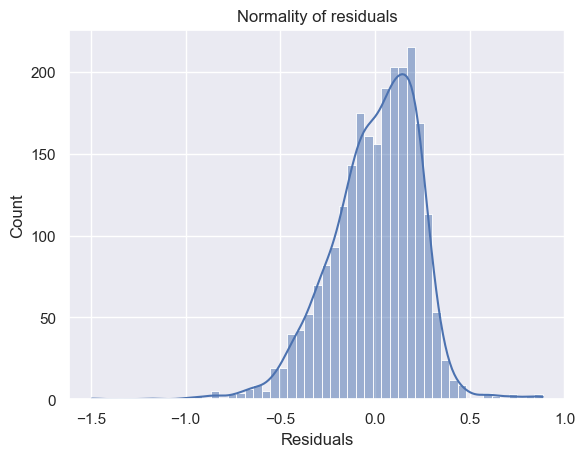

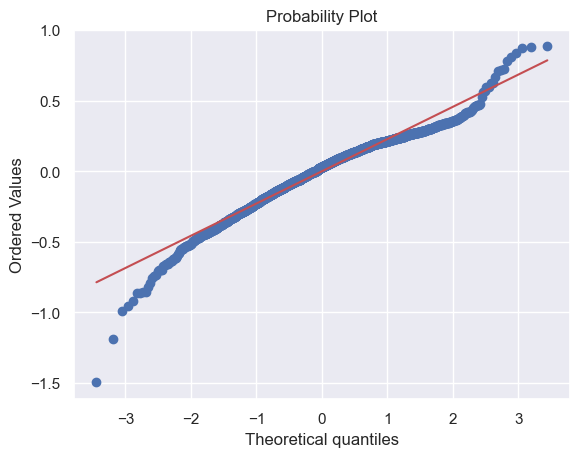

In [68]:
import pylab
import scipy.stats as stats

sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()


- The histogram of residuals does have a bell shape.
- following Q-Q test The residuals more or less follow a straight line except for the tails.

**Let's check the results of the Shapiro-Wilk test.**

In [69]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9690964221954346, pvalue=2.131064442768085e-22)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.

Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.So, the assumption is satisfied.

#### TEST FOR HOMOSCEDASTICITY


**Homoscedascity:** If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

**Heteroscedascity:** If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

#### Why the test?

- The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

#### How to check for homoscedasticity?

- The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.

- The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

- Null hypothesis: Residuals are homoscedastic

- Alternate hypothesis: Residuals have heteroscedasticity

#### How to fix if this assumption is not followed?

- Heteroscedasticity can be fixed by adding other important features or making transformations.

In [70]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0438035947010254), ('p-value', 0.22944475832467995)]

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.

### Predictions on test data

- Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [96]:
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
866,4.038832,NaN
957,2.800325,NaN
280,4.370713,NaN
2150,4.677863,NaN
93,4.517650,NaN
1040,4.645640,NaN
3170,3.764451,NaN
2742,4.422809,NaN
102,4.959412,NaN
1195,4.227855,NaN


## Final Model

In [87]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     988.1
Date:                   Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                           18:37:25   Log-Likelihood:                 104.71
No. Observations:                   2417   AIC:                            -181.4
Df Residuals:                       2403   BIC:                            -100.4
Df Model:                             13                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [73]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final,x_test_final,y_train) 
olsmodel_final_test_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


In [98]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231712,0.181763,0.842409,0.841491,4.359962


## Actionable Insights and Recommendations 

- The average Number of days the used/refurbished device has been used is 674 days
- The avarage of the Normalized price of a new device of the same model in euros 5.2
- The avarage of the Normalized price of a used device of the same model in euros 4.36
- The average Year of releasing the device model is 2015 while releasing year ranges from 2015 to 2020

- 93% of the os of the devices is Android
- Screen size and weight are the most correlated variables of .83 correlation
- Screen size and battery are second most correlated variable of .81 correlation
- Battery and weight are the third most correlated variable of .70 correlation
- Normalized used price and screen size are kindly high correlated
- Brands with high battery have big weight
- 1099 device has screen size more than 6 inches
- Devices that support 4G have higher normalized used price between almost 4.2 and 4.9
- Devices that support 5G have higher normalized used price between almost 5 and 5.3

- The training 𝑅2 is 0.844 so the model is not underfitting
- The train and test RMSE and MAE are comparable, so the model is not overfitting either
- MAE suggests that the model can predict normalised used price within a mean error of 0.18 on the test data
- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of normalised used price
- brand_name_Apple had the highest VIF 
- By making a plot of fitted values vs residualsWe see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.
- According to shapiro test we can accept this distribution as close to being normal.So, the assumption is satisfied.
- By applying the goldfeldquandt we can say the the residuals are homoscedastic


